In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
train_1 = pd.read_csv('ACT1_train_50_corr_red.csv')

In [37]:
train_1.head(5)

,Unnamed: 0,Act,D_1114,D_1115,D_1116,D_1117,D_1215,D_1217,D_1286,D_1486,...,D_519,D_520,D_521,D_5523,D_5524,D_5526,D_5527,D_7349,D_834,D_835
0,0,6.0179,0,0,0,0,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4.3003,0,0,0,0,3,2,0,0,...,0,0,0,1,1,0,1,0,0,0
2,2,5.2697,0,0,0,0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.1797,0,0,0,0,5,5,0,0,...,0,0,0,4,4,2,3,1,0,0
4,4,4.3003,0,0,0,0,4,2,3,0,...,0,0,0,3,0,0,0,2,0,0


In [38]:
from sklearn.model_selection import train_test_split
import numpy as np
y = train_1['Act'].values
train_1 = train_1.drop(['Act', 'Unnamed: 0'], axis = 1)
x = train_1.values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)


In [39]:
print(np.shape(Y_train), np.shape(X_train), np.shape(Y_test), np.shape(X_test))
Y_train = np.reshape(Y_train,(len(Y_train),1))
Y_test = np.reshape(Y_test,(len(Y_test),1))


(22344,) (22344, 49) (7449,) (7449, 49)


In [40]:
def r_square(X, Y):
    """ r^2 value defined by the competition host, r^2 = 1 indicates 100% prediction accuracy
    """
    avx = np.mean(X)
    avy = np.mean(Y)
    sum1, sumx, sumy = 0, 0, 0
    for i in range(len(X)):
        sum1 += (X[i] - avx)*(Y[i] - avy)
        sumx += (X[i] - avx)*(X[i] - avx)
        sumy += (Y[i] - avy)*(Y[i] - avy)
    print(len(X), sum1, sumx, sumy)
    return sum1*sum1/(sumx*sumy)

In [41]:
from keras import backend as K
#Keras R_2 function
R_2 = []
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [42]:
from sklearn.metrics import make_scorer
#Keras MAPE function
MAPE = []
def mean_ape(y_true, y_pred):
    return K.mean(K.abs((y_true-y_pred)/y_true))*100
#Scikit learn mape function
def mean_apes(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
mape_func = make_scorer(mean_apes)

In [43]:
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scipy.stats import randint

In [51]:
#Keras model
for epochs in [100]:
    for batch in [50]:
        K.clear_session()
        model = keras.models.Sequential();
        model.add(keras.layers.core.Dense(units = 40, activation='relu', input_dim = 49));
        model.add(keras.layers.core.Dense(units=20, activation = 'relu'))
        model.add(keras.layers.core.Dense(1, activation = 'relu'));
        adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False);
        model.compile(loss="mean_squared_error", optimizer=adam, metrics = [coeff_determination, mean_ape,'mae']);
        print(model.summary(), 'Epochs = ', epochs, 'Batch =', batch);
        history = model.fit(X_train, Y_train, epochs = epochs, batch_size= batch, verbose = 1);
        #print(model.evaluate(X_val, Y_val,verbose=False)[1], )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                2000      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 2,841
Trainable params: 2,841
Non-trainable params: 0
_________________________________________________________________
None Epochs =  100 Batch = 50
Epoch 1/100
22344/22344 [==============================] - 1s 29us/step - loss: 0.6993 - coeff_determination: -0.9982 - mean_ape: 12.1986 - mean_absolute_error: 0.5866
Epoch 2/100
22344/22344 [==============================] - 0s 20us/step - loss: 0.2822 - coeff_determination: 0.2551 - mean_ape: 7.7413 - mean_absolute_error: 0.3822
Epoch 3/100
22344/22344 [===============

22344/22344 [==============================] - 0s 19us/step - loss: 0.1947 - coeff_determination: 0.4798 - mean_ape: 6.2786 - mean_absolute_error: 0.3101
Epoch 94/100
22344/22344 [==============================] - 0s 20us/step - loss: 0.1978 - coeff_determination: 0.4772 - mean_ape: 6.3488 - mean_absolute_error: 0.3137
Epoch 95/100
22344/22344 [==============================] - 0s 22us/step - loss: 0.1940 - coeff_determination: 0.4818 - mean_ape: 6.2952 - mean_absolute_error: 0.3106
Epoch 96/100
22344/22344 [==============================] - 0s 19us/step - loss: 0.1948 - coeff_determination: 0.4830 - mean_ape: 6.2796 - mean_absolute_error: 0.3102
Epoch 97/100
22344/22344 [==============================] - 0s 20us/step - loss: 0.1931 - coeff_determination: 0.4810 - mean_ape: 6.2728 - mean_absolute_error: 0.3095
Epoch 98/100
22344/22344 [==============================] - 0s 20us/step - loss: 0.1929 - coeff_determination: 0.4910 - mean_ape: 6.2452 - mean_absolute_error: 0.3083
Epoch 99/10

In [75]:
print(history.history.keys())

dict_keys(['loss', 'coeff_determination', 'mean_ape', 'mean_absolute_error'])


In [76]:
print(model.evaluate(X_test, Y_test,verbose=False))

[0.22420206837252055, 0.3944784748567034, 6.461971824330495, 0.3220760900083085]
[0.22637623757151953, 0.3902329601590498, 6.501329606100127, 0.3230479818644148]


In [85]:
Y_predict = model.predict(X_test)

7449

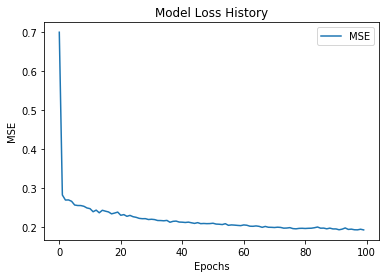

In [80]:
plt.plot(history.history['loss'])
#plt.plot(history.history['mean_ape'])
plt.title('Model Loss History')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['MSE'])


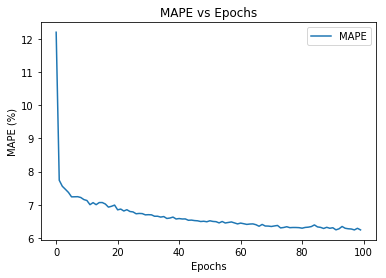

In [81]:
plt.plot(history.history['mean_ape'])
#plt.plot(history.history['mean_ape'])
plt.title('MAPE vs Epochs')
plt.ylabel('MAPE (%)')
plt.xlabel('Epochs')
plt.legend(['MAPE'])


6.219061201407364


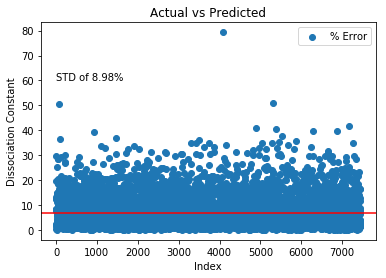

In [89]:
comparison = np.ravel(np.abs((Y_predict-Y_test)/Y_test*100))
abs_comparison = np.abs(comparison)
mask = np.where(abs_comparison>0)
plt.scatter(range(np.shape(mask)[1]), comparison[mask])
#plt.axhline(y=mean_apes(Y_predict,Y_test), color='r', linestyle='-')
#plt.axhline(y=-mean_apes(Y_predict,Y_test), color='r', linestyle='-')
plt.title('Actual vs Predicted')
plt.ylabel('Dissociation Constant')
plt.xlabel('Index')
plt.legend(['% Error', 'MAPE'])
plt.text(0.05, 60, 'STD of 8.98%')
plt.axhline(y=mean_apes(Y_predict,Y_test), color='r', linestyle='-')
print(comparison.std())

Text(40, 1500, 'STD of 8.98%')

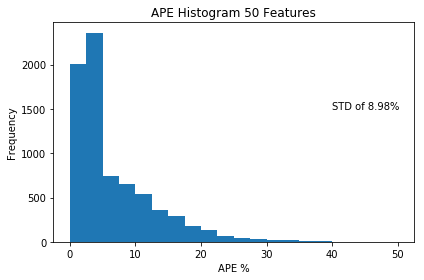

In [93]:
fig, ax= plt.subplots(1, 1,tight_layout=True)
ax.hist(comparison,np.linspace(0,50,21))
ax.set_xlabel('APE %')
ax.set_ylabel('Frequency')
ax.set_title('APE Histogram 50 Features')
ax.text(40, 1500, 'STD of 8.98%')

In [84]:
# exportdata = pd.DataFrame()
# exportdata['loss_anova'] = history.history['loss']
# exportdata['mean_ape'] = history.history['mean_ape']
# exportdata['mean_absolute_error'] = history.history['mean_absolute_error']
# exportdata['coeff_determination'] = history.history['coeff_determination']
# exportdata.to_csv('50_data_plots.csv')



